In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [3]:
cra_color = 'darkorange'
nsc_color = 'dodgerblue'
eco_color = 'dimgrey'

# Plot the cost effectiveness plane

In [4]:
cra = [206527.25, 29.0756]
nsc = [205957.32, 29.0785]
eco = [205928.94, 29.0801]

line_x = [nsc[0], eco[0]]
line_y = [nsc[1], eco[1]]

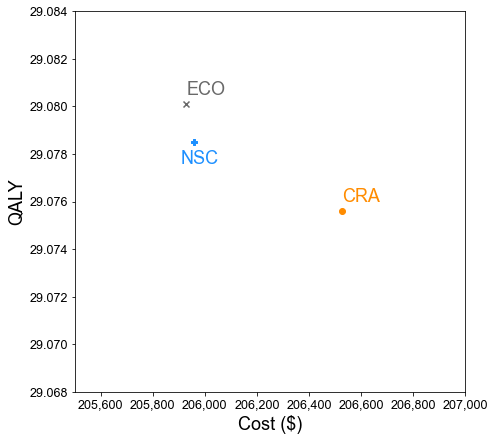

In [24]:
fig, ax = plt.subplots(figsize=(7,7))
ax.get_xaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.plot(line_x, line_y, color='sienna', zorder=1, linestyle='dotted')
plt.scatter(cra[0], cra[1], label="CRA", color=cra_color, marker='o')
plt.text(cra[0], cra[1]+0.0004, "CRA", color=cra_color)
plt.scatter(nsc[0], nsc[1], label="NSC", color=nsc_color, marker='P', zorder=2)
plt.text(nsc[0]-50, nsc[1]-0.0009, "NSC", color=nsc_color)
plt.scatter(eco[0], eco[1], label="ECO", color=eco_color, marker='x', zorder=3)
plt.text(eco[0], eco[1]+0.0004, "ECO", color=eco_color)
#plt.text(eco[0], eco[1]-0.001, "+$50,800/QALY", color='sienna')
plt.xlim(205500, 207000)
plt.ylim(29.068, 29.084)
plt.xlabel('Cost ($)')
plt.ylabel('QALY')
plt.show()

# Plot the PSA

In [6]:
psa = pd.read_csv("PSA/May8/psa10000_scatter_new.csv")

In [7]:
psa.columns

Index(['Iteration', 'Parameters', 'pSepsis1', 'pChorio', 'pSepsis1c',
       'pSepsis2Red', 'pSepsis2YellowBCPos', 'pIllAppearingBCPosYellow',
       'pIllAppearingGreen', 'pIllAppearingNoChorio', 'pIllAppearingStrat3',
       'pSepsis3', 'pSepsis2Green', 'pYellow', 'pRed', 'scale2', 'scale3',
       'pSepsis3Scaled', 'pSepsis2GreenScaled', 'pSepsis2YellowBCPosScaled',
       'pSepsis2RedScaled', 'IncidenceEOS', 'scale1', 'pSepsis1Scaled',
       'pSepsis1cScaled', 'pReadmission', 'pDeathAfterReadmission',
       'pLTSAfterReadmission', 'pOtotoxicity', 'pLTSCSFPos', 'pCSFPosDeath',
       'pCSFNegDeath', 'pCSFPos', 'cLevel1NurseryAdmissionPerDay',
       'cLevel1NursingCarePerDay', 'cLevel2NICUAdmissionPerDay',
       'cLevel2NursingCarePerDay', 'cGentamicin1', 'cAmpicillin1',
       'cInitialNICUTests', 'cBloodCulture1', 'cCSFNeg', 'cReadmission',
       'qNLTS', 'qDeath', 'qNCD', 'qOtotoxicity', 'c2DayNursery', 'c7DayNICU',
       'cYellow', 'c2DayNICU', 'cCSFPos', 'cDeath', 'cNCD', 

In [8]:
psa.head()

,Iteration,Parameters,pSepsis1,pChorio,pSepsis1c,pSepsis2Red,pSepsis2YellowBCPos,pIllAppearingBCPosYellow,pIllAppearingGreen,pIllAppearingNoChorio,...,NSC.1,Enhanced Clinical Observation.1,LY,Categorical Risk Assessment.2,NSC.2,Enhanced Clinical Observation.2,ICER ($/QALY),Categorical Risk Assessment.3,NSC.3,Enhanced Clinical Observation.3
0,1,NaN,0.025264,0.064809,0.009565,0.008204,0.008787,0.140841,0.011741,0.055766,...,29.082888,29.082998,NaN,0.999999,0.999999,0.999999,NaN,Strongly Dominated (Baseline),Cost Saving,3128820.2108103163
1,2,NaN,0.018016,0.055440,0.005526,0.008144,0.011225,0.124410,0.009192,0.050796,...,29.074619,29.078067,NaN,0.999983,0.999983,0.999983,NaN,Strongly Dominated (Baseline),Cost Saving,43443.324728971646
2,3,NaN,0.012403,0.060751,0.007005,0.009086,0.007876,0.158511,0.029122,0.050976,...,29.078576,29.080911,NaN,0.999992,0.999992,0.999992,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving
3,4,NaN,0.020577,0.049639,0.006267,0.008224,0.011879,0.126885,0.011245,0.053815,...,29.078168,29.079473,NaN,0.999984,0.999984,0.999984,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving
4,5,NaN,0.019536,0.051410,0.008064,0.008765,0.006570,0.196869,0.007289,0.054603,...,29.081419,29.082186,NaN,0.999999,0.999999,0.999999,NaN,Strongly Dominated (Baseline),Strongly Dominated,Cost Saving


In [9]:
# Compare CRA and ECO to NSC

psa['CRA_NSC_Icr_QALY'] = psa["Categorical Risk Assessment.1"] - psa["NSC.1"]
psa['CRA_NSC_Icr_Cost'] = psa["Categorical Risk Assessment"] - psa["NSC"]
psa['ECO_NSC_Icr_QALY'] = psa["Enhanced Clinical Observation.1"] - psa["NSC.1"]
psa['ECO_NSC_Icr_Cost'] = psa["Enhanced Clinical Observation"] - psa["NSC"]

psa['CRA_Cost_Saving_WRT_NSC'] = (psa['CRA_NSC_Icr_QALY'] > 0) & (psa['CRA_NSC_Icr_Cost'] < 0)
psa['CRA_CE_WRT_NSC'] = (psa['CRA_NSC_Icr_QALY'] > 0) & (psa['CRA_NSC_Icr_Cost']/psa['CRA_NSC_Icr_QALY'] <= 100000)
psa['ECO_Cost_Saving_WRT_NSC'] = (psa['ECO_NSC_Icr_QALY'] > 0) & (psa['ECO_NSC_Icr_Cost'] < 0)
psa['ECO_CE_WRT_NSC'] = (psa['ECO_NSC_Icr_QALY'] > 0) & (psa['ECO_NSC_Icr_Cost']/psa['ECO_NSC_Icr_QALY'] <= 100000)

print(psa['CRA_Cost_Saving_WRT_NSC'].value_counts())
print(psa['CRA_CE_WRT_NSC'].value_counts())
print(psa['ECO_Cost_Saving_WRT_NSC'].value_counts())
print(psa['ECO_CE_WRT_NSC'].value_counts())

False    9996
True        4
Name: CRA_Cost_Saving_WRT_NSC, dtype: int64
False    9996
True        4
Name: CRA_CE_WRT_NSC, dtype: int64
False    5122
True     4878
Name: ECO_Cost_Saving_WRT_NSC, dtype: int64
True     6594
False    3406
Name: ECO_CE_WRT_NSC, dtype: int64


In [10]:
# Compare CRA and ECO to NSC

psa['NSC_CRA_Icr_QALY'] = psa["NSC.1"] - psa["Categorical Risk Assessment.1"]
psa['NSC_CRA_Icr_Cost'] = psa["NSC"] - psa["Categorical Risk Assessment"]
psa['ECO_CRA_Icr_QALY'] = psa["Enhanced Clinical Observation.1"] - psa["Categorical Risk Assessment.1"]
psa['ECO_CRA_Icr_Cost'] = psa["Enhanced Clinical Observation"] - psa["Categorical Risk Assessment"]

psa['NSC_Cost_Saving_WRT_CRA'] = (psa['NSC_CRA_Icr_QALY'] > 0) & (psa['NSC_CRA_Icr_Cost'] < 0)
psa['NSC_CE_WRT_CRA'] = (psa['NSC_CRA_Icr_QALY'] > 0) & (psa['NSC_CRA_Icr_Cost']/psa['NSC_CRA_Icr_QALY'] <= 100000)
psa['ECO_Cost_Saving_WRT_CRA'] = (psa['ECO_CRA_Icr_QALY'] > 0) & (psa['ECO_CRA_Icr_Cost'] < 0)
psa['ECO_CE_WRT_CRA'] = (psa['ECO_CRA_Icr_QALY'] > 0) & (psa['ECO_CRA_Icr_Cost']/psa['ECO_CRA_Icr_QALY'] <= 100000)

print(psa['NSC_Cost_Saving_WRT_CRA'].value_counts())
print(psa['NSC_CE_WRT_CRA'].value_counts())
print(psa['ECO_Cost_Saving_WRT_CRA'].value_counts())
print(psa['ECO_CE_WRT_CRA'].value_counts())


True     9994
False       6
Name: NSC_Cost_Saving_WRT_CRA, dtype: int64
True     9995
False       5
Name: NSC_CE_WRT_CRA, dtype: int64
True     9336
False     664
Name: ECO_Cost_Saving_WRT_CRA, dtype: int64
True     9761
False     239
Name: ECO_CE_WRT_CRA, dtype: int64


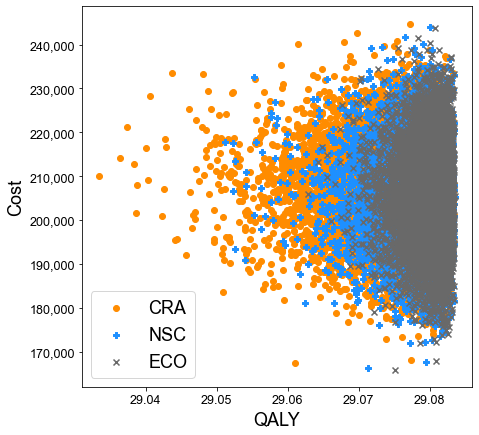

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.scatter(psa["Categorical Risk Assessment.1"], psa["Categorical Risk Assessment"],
            label="CRA", color=cra_color, marker='o', zorder=1)
plt.scatter(psa["NSC.1"], psa["NSC"],
            label="NSC", color=nsc_color, marker='P', zorder=2)
plt.scatter(psa["Enhanced Clinical Observation.1"], psa["Enhanced Clinical Observation"],
            label="ECO", color=eco_color, marker='x', zorder=3)
plt.xlabel('QALY')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [12]:
x_vals = np.arange(-0.010, 0.020, 0.01)

In [13]:
wtp100000 = 100000*x_vals
wtp50000 = 50000*x_vals

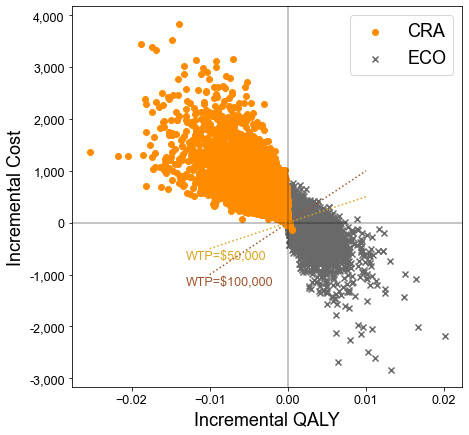

In [14]:
fig, ax = plt.subplots(figsize=(7,7))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.scatter(psa["Categorical Risk Assessment.1"] - psa["NSC.1"], psa["Categorical Risk Assessment"] - psa["NSC"],
            label="CRA", color=cra_color, marker='o', zorder=4)
plt.scatter(psa["Enhanced Clinical Observation.1"] - psa["NSC.1"], psa["Enhanced Clinical Observation"] - psa["NSC"],
            label="ECO", color=eco_color, marker='x', zorder=3)
plt.axvline(x=0, color='black', alpha=0.3, zorder=5)
plt.axhline(y=0, color='black', alpha=0.3, zorder=5)
plt.plot(x_vals, wtp100000, zorder=6, label='_$100,000 WTP Threshold', color='sienna', linestyle='dotted')
plt.text(x_vals[0]-0.003, wtp100000[0]-200, "WTP=$100,000", color='sienna', fontsize='x-small')
plt.plot(x_vals, wtp50000, zorder=6, label='_$50,000 WTP Threshold', color='goldenrod', linestyle='dotted')
plt.text(x_vals[0]-0.003, wtp50000[0]-200, "WTP=$50,000", color='goldenrod', fontsize='x-small')
plt.xlabel('Incremental QALY')
plt.ylabel('Incremental Cost')
plt.legend()
plt.show()

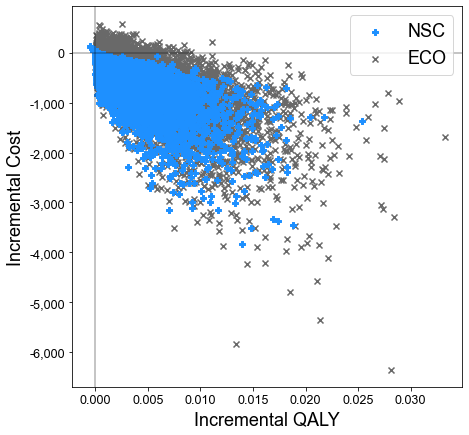

In [22]:
fig, ax = plt.subplots(figsize=(7,7))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
#plt.scatter(psa["Categorical Risk Assessment.1"] - psa["NSC.1"], psa["Categorical Risk Assessment"] - psa["NSC"],
#            label="CRA", color=cra_color, marker='.', zorder=4)
plt.scatter(psa["NSC.1"] - psa["Categorical Risk Assessment.1"], psa["NSC"] - psa["Categorical Risk Assessment"],
            label="NSC", color=nsc_color, marker='P', zorder=4)
plt.scatter(psa["Enhanced Clinical Observation.1"] - psa["Categorical Risk Assessment.1"], psa["Enhanced Clinical Observation"] - psa["Categorical Risk Assessment"],
            label="ECO", color=eco_color, marker='x', zorder=3)

plt.axvline(x=0, color='black', alpha=0.3, zorder=5)
plt.axhline(y=0, color='black', alpha=0.3, zorder=5)
plt.xlabel('Incremental QALY')
plt.ylabel('Incremental Cost')
plt.legend()
plt.show()

In [16]:
ce_accept_curve = pd.read_csv("PSA/May8/psa10000cecurve_new.csv")

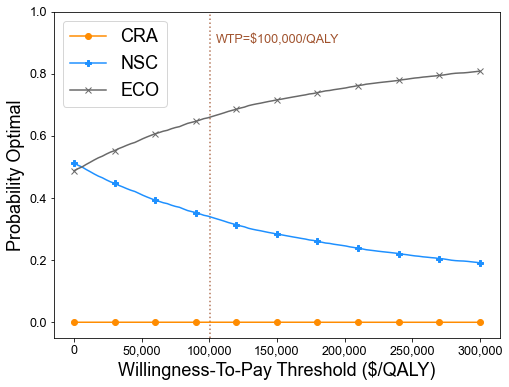

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
ax.get_xaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.plot(ce_accept_curve["WTP"], ce_accept_curve["Categorical Risk Assessment"],
            label="CRA", color=cra_color, marker='o',markevery=10, zorder=1)
plt.plot(ce_accept_curve["WTP"], ce_accept_curve["NSC"],
            label="NSC", color=nsc_color, marker='P',markevery=10, zorder=2)
plt.plot(ce_accept_curve["WTP"], ce_accept_curve["Enhanced Clinical Observation"],
            label="ECO", color=eco_color, marker='x',markevery=10, zorder=3)
plt.axvline(x=100175, color='sienna', alpha=0.8, zorder=0, linestyle='dotted')
plt.text(105000, 0.9, "WTP=$100,000/QALY", color='sienna', fontsize='x-small')
plt.xlabel('Willingness-To-Pay Threshold ($/QALY)')
plt.ylabel('Probability Optimal')
plt.ylim(-0.05,1)
plt.legend()
plt.show()